In [104]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from plotnine import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error #model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix,\
 f1_score, recall_score, plot_roc_curve, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

%matplotlib inline

In [105]:
donuts=pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")
donuts=donuts.dropna(axis=1)
donuts.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_Unit,Calories,Total_Fat,...,Sugar,Calories_100g,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,g,350,19.0,...,26,350,19,9,0,0,110,42,4,26
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,g,280,13.0,...,19,394,18,7,0,35,437,52,4,27
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,g,300,15.0,...,17,353,18,8,0,0,165,44,5,20
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,g,240,11.0,...,20,381,17,8,0,0,143,52,5,32
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,g,260,10.0,...,26,371,14,6,0,29,386,57,4,37


1a)

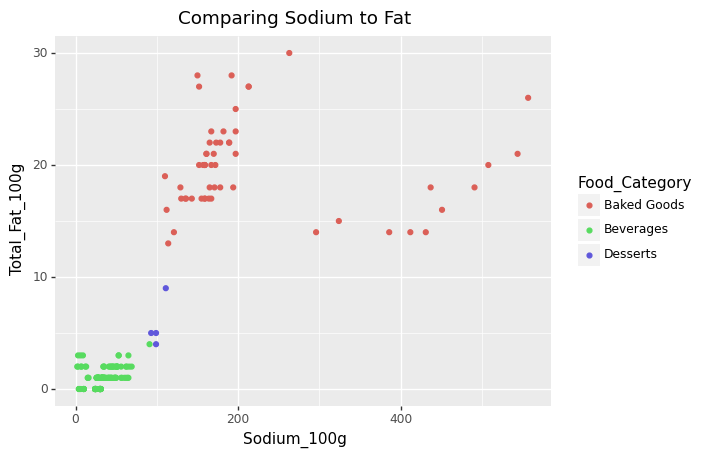

<ggplot: (8791160356137)>

In [106]:
ggplot(donuts,aes(x='Sodium_100g',y='Total_Fat_100g',color='Food_Category'))+geom_point()+ggtitle("Comparing Sodium to Fat")

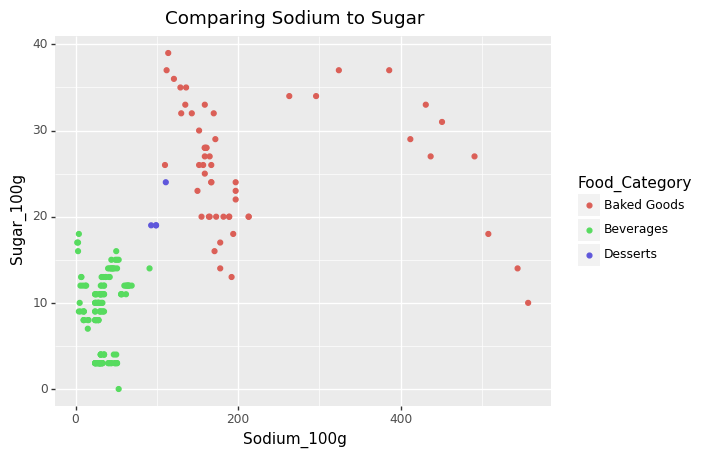

<ggplot: (8791160641137)>

In [107]:
ggplot(donuts,aes(x='Sodium_100g',y='Sugar_100g',color='Food_Category'))+geom_point()+ggtitle("Comparing Sodium to Sugar")

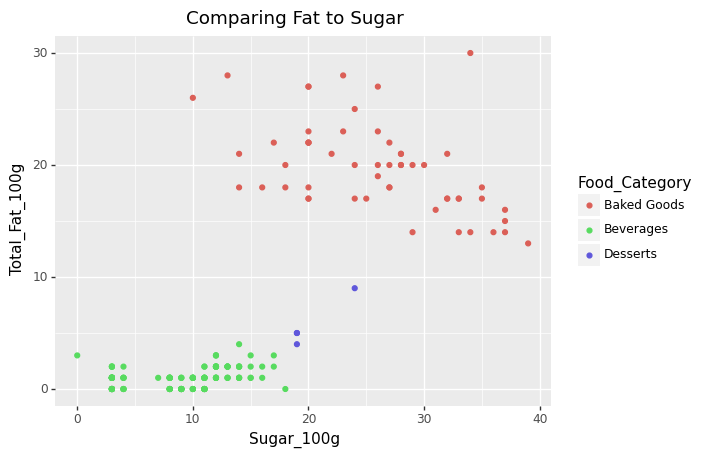

<ggplot: (8791160672917)>

In [108]:
ggplot(donuts,aes(x='Sugar_100g',y='Total_Fat_100g',color='Food_Category'))+geom_point()+ggtitle("Comparing Fat to Sugar")

1b)

The model I think would perform best on this dataset is Gaussian Mixture/EM and I think DBSCAN would do the worst on this data. The other two would be ok but not great. 

Hierarchical clustering would not be too good because the data doesn't fit into a hierarchy as I think the true clusters of the data are the food category if we had a true label within the dataset. Additionally while the various linkage types could apply, the potential clusters as denoted by the category of food they are extremely varied in density and cohesion from cluster to cluster. 

KMeans wouldn be an ok algorithm for this dataset, primarily because of the  cluster shape. KMeans assumes spherical clusters and these clusters can be encapsulated in spheres. Additonally, KMeans assumes that all variables have the same variance which seems to be true. But, the clusters don't have equal numbers of datapoints. Not all of KMeans assumptions are met which means it would not wokr too well.

DBSCAN would be the worst. Being able to classify certain points as noise would definteily help to increase the silhouette score and have better cluster membership and boundaries. Additionally, with DBSCAN accounting for noise, points that should be their own clustered group could be assigned to noise and essentially become irrelevant to clustering accuracy

I think Gaussian Mixture would be the best model for this specific dataset. A major reason why I say this is becuse the clusters as denoted by food category are rather elliptical. Gaussian mixture also handles clusters of varied size really well. 
The reason that I mentioned the food category as a color over and over again was because I think the true clusters of this dataset are by food category. All the baked goods have rather similar features and as do the drinks and desserts as well. I know that all clustering models do not have a true label, but I plan to use this clustering by food category as a test of accuracy, along with other various metrics

1c and 1d as well

In [109]:
features = ['Total_Fat_100g', "Sugar_100g",'Sodium_100g']
toz=['Calories_100g',	'Total_Fat_100g',	'Saturated_Fat_100g',	'Trans_Fat_100g',	'Cholesterol_100g',	'Sodium_100g',	'Carbohydrates_100g',	'Protein_100g',	'Sugar_100g']
z = StandardScaler()
donuts[toz]=z.fit_transform(donuts[toz])

Xgm = donuts[features]


#Xgm[features] = z.fit_transform(Xgm)

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sils = []

for k in ks:
  gmm = GaussianMixture(n_components = k)
  gmm.fit(Xgm[features])

  sils.append(silhouette_score(Xgm[features], gmm.predict(Xgm[features])))

sil_df = pd.DataFrame({"K": ks,
                      "silhouette": sils})

#(ggplot(sil_df, aes(x = "K", y = "sils")) + geom_point() + 
#geom_line() + 
#theme_minimal() + 
#labs(title = "Silhouette for Different Ks"))
sil_df

,K,silhouette
0,2,0.737051
1,3,0.740626
2,4,0.587635
3,5,0.684111
4,6,0.529143
5,7,0.519157
6,8,0.493811
7,9,0.406576
8,10,0.471568
9,11,0.515112


To get the best number of components, I used a for loop with differing num componenets and in the loop, I kept fitting a GMM model on my data with various ks and recorded k and the silhouette score into a dataframe and picked the k with the highest silhouette score which was 3 with a silhouette score of .74

In [110]:
GM=GaussianMixture(n_components=3)
GM.fit(Xgm)
Cluster=GM.predict(Xgm)
silhouette_score(Xgm[features], Cluster)
Xgm["cluster"] = Cluster


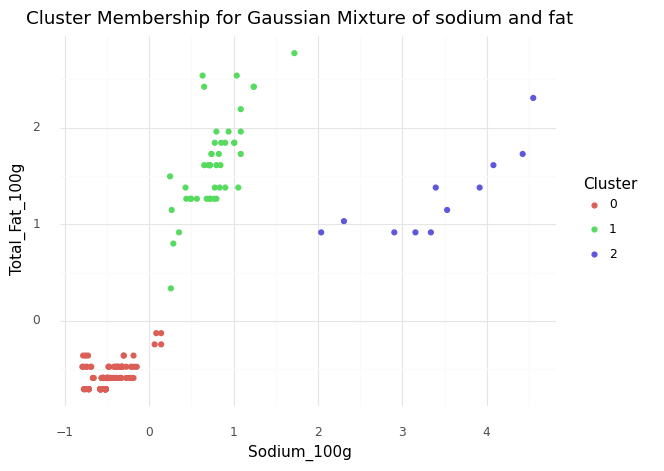

<ggplot: (8791160301445)>

In [111]:
(ggplot(Xgm, aes(x='Sodium_100g',y='Total_Fat_100g', color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership for Gaussian Mixture of sodium and fat") + scale_color_discrete(name ="Cluster"))

Cluster membership for this plot:
Since I know in the dataframe the three categories something can fall in terms of food type is and I believe that dictates our clusters

0: I think the low sodium and low fat cluster is a cluster of beverages. As we get close to and approach (0,0) I think that represents stuff like diet sodas and as fat/sodium gets higher I think that represents stuff like coffee drinks/milkshake type drinks.

1: I think that this cluster represents regular donuts/baked goods. This one is characterized by medium amounts of sodium and high fats. While we don't consider donuts to be decently salty I think that some savory donuts can tend to have high salt and that salt can add flavor to donuts positively in general

2: I think that this cluster of high sodium and high fat represents baked goods such as breakfast sandwiches and especially items with bacon. Breakfast sandwiches are typically fatty and high in sodium for flavor

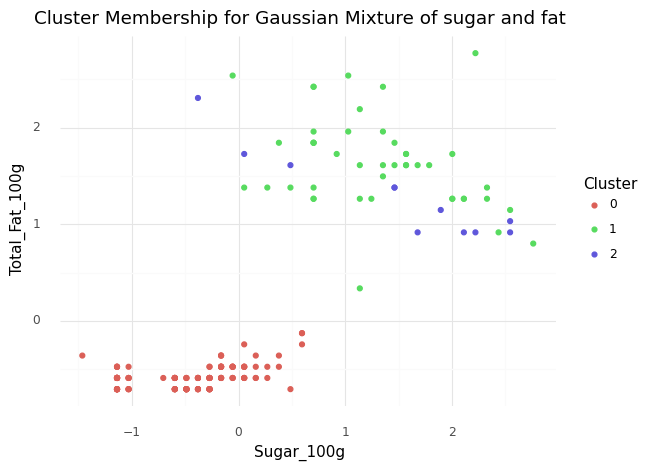

<ggplot: (8791160980549)>

In [112]:
(ggplot(Xgm, aes(x='Sugar_100g',y='Total_Fat_100g', color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership for Gaussian Mixture of sugar and fat") + scale_color_discrete(name ="Cluster"))

Cluster membership

0: I think cluster zero represents drinks again, with points closer to (0,0) being diet sodas and the points with more sugar being regular soda and sugary coffeee drinks

1: I think cluster one, which is characterized by high sugar and fat are especially unhealthy donuts like ones with lots of frosting or sprinkles

2: This cluster is very odd as it is medium to high sugar and ranges similarly in fat content. I think this cluster could be called "regular" donuts as I don't really think healthy donuts exist

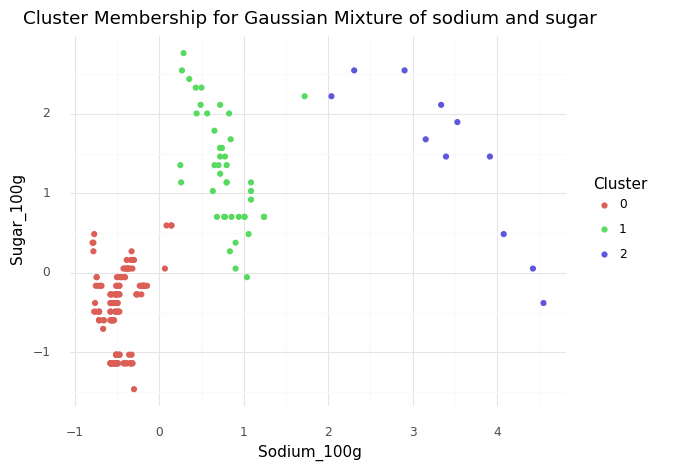

<ggplot: (8791160939313)>

In [113]:
(ggplot(Xgm, aes(x='Sodium_100g',y='Sugar_100g', color = "factor(cluster)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership for Gaussian Mixture of sodium and sugar") + scale_color_discrete(name ="Cluster"))

Cluster membership

0: I think cluster 0 is drinks again as points in cluster 0 closest to (0,0) represent diet sodas and points with higher sugar represent regular sodas and sugary coffee drinks

1: I think cluster 1 would be donuts again as donuts don't have too much salt but a lot of sugar as they are very sweet

2: I think cluster 2 is representative of the unhealthiest of items such as cake type donuts because those would have high sodium and sugar, which is what this cluster is characterized by

For Gaussian mixture, I used silhouette score and visual analysis of the clusters themselves to analyze how well my model did. The silhouette score I got for GMM was .74 and I consider that to be pretty good as the highest possible silhouette score is 1. As silhouette score is a metric of how well the clustering algorithm worked, I would say that my model worked pretty well. 

Based on knowledge of the dataset, the true clusters of this data is the type of food that a datapoint is and I feel that my GMM did a good job categorizing what kind of food any given point is 

In [114]:
mins = 3
nn = NearestNeighbors(n_neighbors=mins+1)

nn.fit(donuts[features])

distances, neighbors = nn.kneighbors(donuts[features])
distances = np.sort(distances[:, mins], axis = 0)

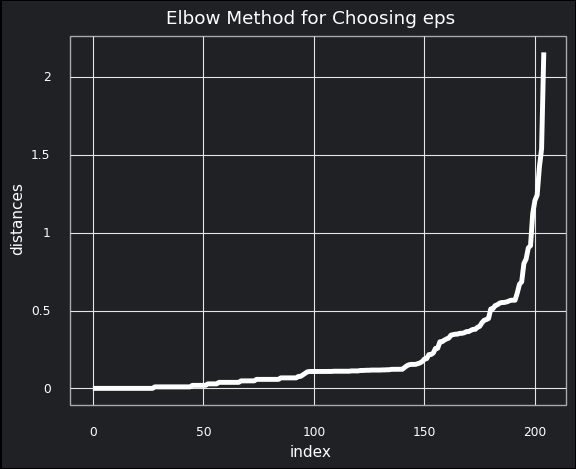

<ggplot: (8791161052533)>

In [115]:
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

I used the elbow method using nearest neighbors to calculate the eps value and I got .4 as where the elbow occurs and for min_samples, after some research I found that a good value is 2xnumfeatures which in our case is 2x3=6

In [127]:
Xdb=donuts[features]
DB=DBSCAN(eps=.5,min_samples=6)
#DB.fit(Xdb)
DBClust=DB.fit_predict(Xdb)
Xdb['DBClust']=DBClust
print(silhouette_score(Xdb,DBClust))

0.7046548148281953


While .70 is an ok silhouette score and very close to the GMM, DBSCAN performed very poorly as can clearly be seen with some visual analysis of the clusters. For example, in sugar and fat we have noise points right in the middle of a cluster and with every single graph for DBSCAN, we totally lose a cluster to noise when we could have had a true cluster for a group of similar points. In other graphs as well, we see noise points that should arguably be in a cluster instead of noise.

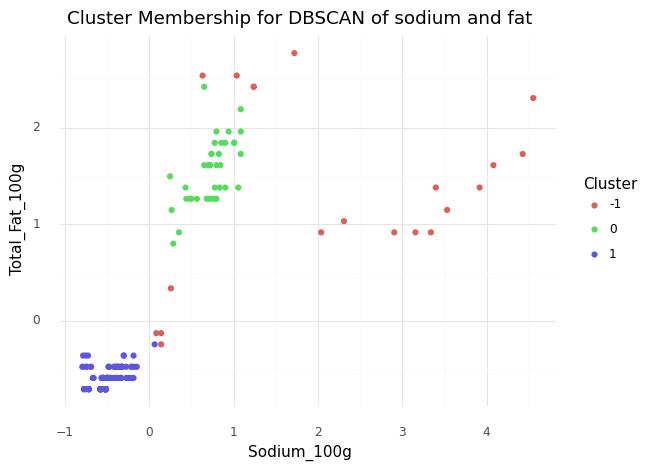

<ggplot: (8791160658613)>

In [128]:
(ggplot(Xdb, aes(x='Sodium_100g',y='Total_Fat_100g', color = "factor(DBClust)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership for DBSCAN of sodium and fat") + scale_color_discrete(name ="Cluster"))

Cluster membership

-1: This cluster is characterized by high fat and sodium and seems to be representatative of the unhealthiest types of donuts

0: This cluster is characterized by low-high fat and low sodium. I think that this cluster is typical donuts as some are more fatty than others

1: This cluster is characterized by low sodium and low fat. I think this cluster is representative of beverages with the lowest in both categories being diet sodas and values higehr in fat or sodium or regular sodas or sugary/coffee drinks

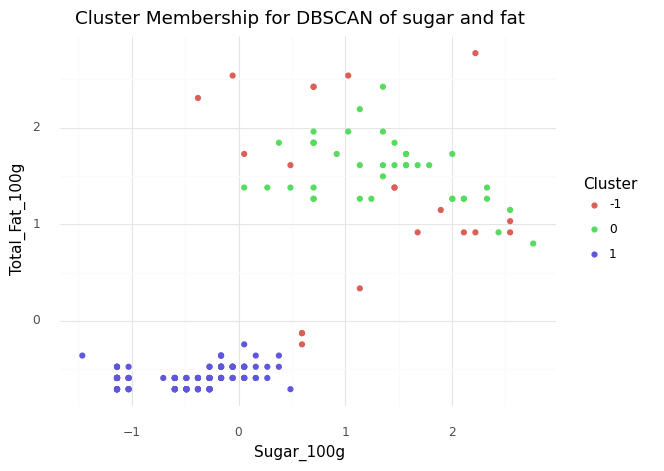

<ggplot: (8791160209341)>

In [131]:
(ggplot(Xdb, aes(x='Sugar_100g',y='Total_Fat_100g', color = "factor(DBClust)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership for DBSCAN of sugar and fat") + scale_color_discrete(name ="Cluster"))

Cluster membership

-1: This cluster is characterized by mid to low fat and mid to high sugar. I think these are typical run of the mill donuts.

0: This cluster is characterized by mid to high sugar and high fat overall. I think that this cluster is representative of the regular to moderately unhealthy donuts

1: This cluster is characterized by low to mid sugar and low fats. I think this cluster is representative of beverages as diet sodas have low sugar while other beverages have higher sugar levels.

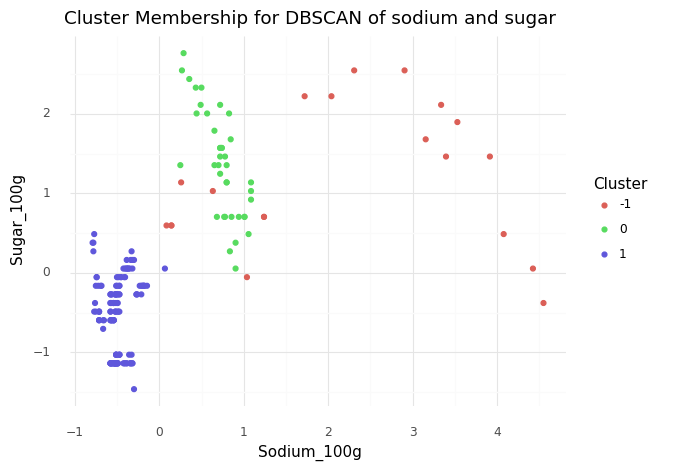

<ggplot: (8791160163365)>

In [129]:
(ggplot(Xdb, aes(x='Sodium_100g',y='Sugar_100g', color = "factor(DBClust)")) + geom_point() + 
theme_minimal() + labs(title = "Cluster Membership for DBSCAN of sodium and sugar") + scale_color_discrete(name ="Cluster"))

-1: This cluster is characterized by high to low sugar and mid to high sodium. I think this cluster can be called relatively unhealthy donuts.

0: This cluster is characterized by mid to high sugar and medium levels of sodium. I think these are what you'd call unhealthy donuts.

1: This cluster is characterized by low to mid sugar and low sodium and is representative of all sorts of beverages

1e)

The fourth _100g feature that I would add to my model to most improve it would be Calories_100g. I think the addition of this feature will be beneficial to my model as it will help the model differentiate things such as high calorie donuts and desserts, medium level calorie sandwiches and regular sodas and then low to zero calorie diet sodas for examples. I think the addition of this will keep similar cluster structure but they will be more cohesive

In [130]:
newfeatures = ['Total_Fat_100g', "Sugar_100g",'Sodium_100g','Calories_100g']
newGauss=GaussianMixture(n_components=2)
newGauss.fit(donuts[newfeatures])
donuts[newfeatures]
print(silhouette_score(donuts[newfeatures],newGauss.predict(donuts[newfeatures])))

0.76748464493029


The inclusion of calories did improve my clustering model by about 2%. While that isn't huge, it is an improvement and likely made the clusters more seperated from each other as the amount of calories is a major factor in seeing what cluster a point belongs to